In [13]:
#!{sys.executable} -m pip install langdetect

import matplotlib.pyplot as plt
import pandas as pd

In [91]:
#file = open('top_compare.pkl', 'wb')
#pickle.dump(top_compare, file)
#file.close()
file = open('top_compare.pkl', 'rb')
top_compare = pickle.load(file)
file.close()

In [213]:
def my_zeros(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        if k not in other:
            zeros += 1
    return zeros

In [425]:
top_compare['zeros_tr_kdb'] = top_compare.apply(lambda row: my_zeros(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['zeros_tr_kwb'] = top_compare.apply(lambda row: my_zeros(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['zeros_tr_yk'] = top_compare.apply(lambda row: my_zeros(row['trends'],row['yake_counter']),axis=1)
top_compare['zeros_tr_rk'] = top_compare.apply(lambda row: my_zeros(row['trends'],row['rake_counter']),axis=1)
zeros_labels = {'zeros_tr_rk':'RAKE','zeros_tr_yk':'YAKE','zeros_tr_kdb':'KeyBERT (D)','zeros_tr_kwb':'KeyBERT (W)'}

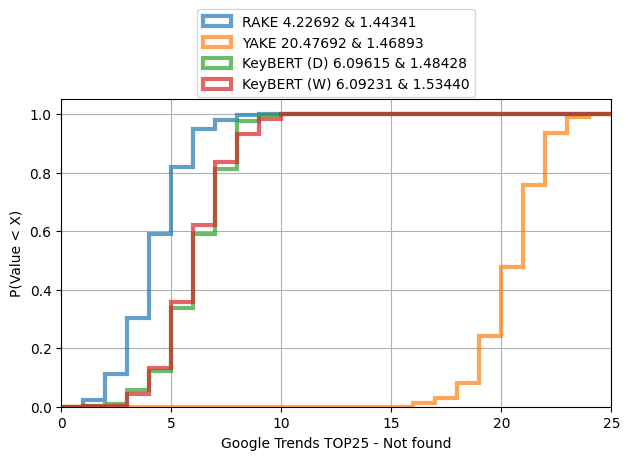

 4.22692 & 1.44341 &  20.47692 & 1.46893 &  6.09615 & 1.48428 &  6.09231 & 1.53440 & 


In [428]:
labels = zeros_labels

all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(alpha=.7, density=True, cumulative=1, bins=list(np.arange(0,30,1)),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel('Google Trends TOP25 - Not found')
plt.ylabel('P(Value < X)')
plt.xlim([0,25])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("unmatched.pdf")
plt.show()
print(all_labs)


In [347]:
top_compare['cosine_tr_kdb'] = top_compare.apply(lambda row: cosine(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['cosine_tr_kwb'] = top_compare.apply(lambda row: cosine(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['cosine_tr_yk'] = top_compare.apply(lambda row: cosine(row['trends'],row['yake_counter']),axis=1)
top_compare['cosine_tr_rk'] = top_compare.apply(lambda row: cosine(row['trends'],row['rake_counter']),axis=1)

In [436]:
cos_labels = {'cosine_tr_rk':'RAKE','cosine_tr_yk':'YAKE','cosine_tr_kdb':'KeyBERT (D)','cosine_tr_kwb':'KeyBERT (W)'}

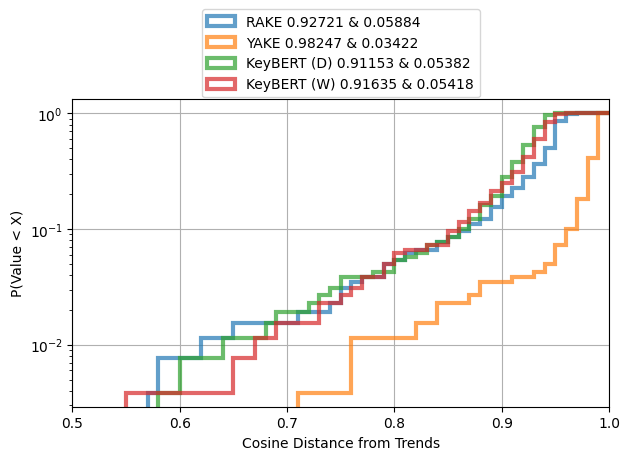

 0.92721 & 0.05884 &  0.98247 & 0.03422 &  0.91153 & 0.05382 &  0.91635 & 0.05418 & 


In [437]:
labels = cos_labels


all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(0.5,1.5,.01),label=cos_labels[k]+label_add, histtype='step',lw=3)
plt.xlabel('Cosine Distance from Trends')
plt.ylabel('P(Value < X)')
plt.xlim([0.5,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("cos_uncut.pdf")
plt.show()

print(all_labs)


In [356]:
def my_cos(gt,other):
    x_match_dict = {}
    y_match_dict = {}
    for k in gt.keys():
        if k in other:
            x_match_dict[k] = gt[k]
            y_match_dict[k] = other[k]
        else:
            x_match_dict[k] = gt[k]
            y_match_dict[k] = 0
    ret = cosine(x_match_dict,y_match_dict)
    return ret


In [438]:
top_compare['mycos_tr_kdb'] = top_compare.apply(lambda row: my_cos(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['mycos_tr_kwb'] = top_compare.apply(lambda row: my_cos(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['mycos_tr_yk'] = top_compare.apply(lambda row: my_cos(row['trends'],row['yake_counter']),axis=1)
top_compare['mycos_tr_rk'] = top_compare.apply(lambda row: my_cos(row['trends'],row['rake_counter']),axis=1)
mycos_labels = {'mycos_tr_rk':'RAKE','mycos_tr_yk':'YAKE','mycos_tr_kdb':'KeyBERT (D)','mycos_tr_kwb':'KeyBERT (W)'}

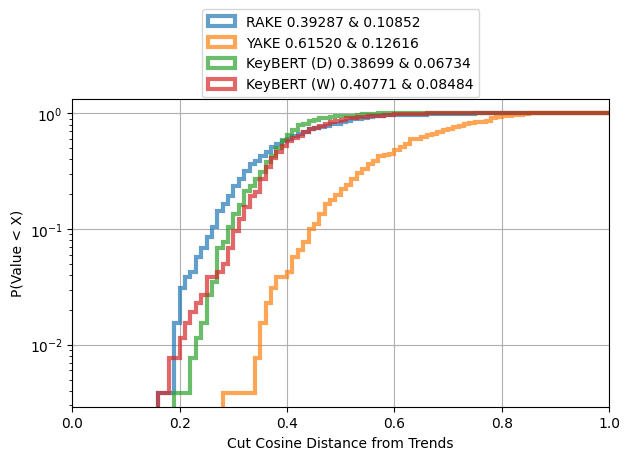

 0.39287 & 0.10852 &  0.61520 & 0.12616 &  0.38699 & 0.06734 &  0.40771 & 0.08484 & 


In [459]:
labels = mycos_labels


all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(0.,1.5,.01),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel('Cut Cosine Distance from Trends')
plt.ylabel('P(Value < X)')
plt.xlim([0.,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("cos_cut.pdf")
plt.show()
print(all_labs)


In [364]:
def my_pears(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        if k in other:
            x_match_val.append(gt[k])
            y_match_val.append(other[k])
        else:
            x_match_val.append(gt[k])
            y_match_val.append(0)
    ret = stats.pearsonr(x_match_val,y_match_val)
    return ret[0]#,ret[1],zeros


In [440]:
top_compare['my_pears_tr_kdb'] = top_compare.apply(lambda row: my_pears(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['my_pears_tr_kwb'] = top_compare.apply(lambda row: my_pears(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['my_pears_tr_yk'] = top_compare.apply(lambda row: my_pears(row['trends'],row['yake_counter']),axis=1)
top_compare['my_pears_tr_rk'] = top_compare.apply(lambda row: my_pears(row['trends'],row['rake_counter']),axis=1)
mypears_labels = {'my_pears_tr_rk':'RAKE','my_pears_tr_yk':'YAKE','my_pears_tr_kdb':'KeyBERT (D)','my_pears_tr_kwb':'KeyBERT (W)'}

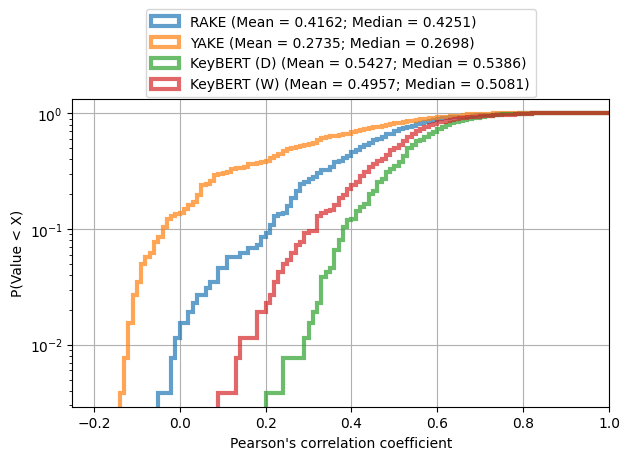

In [441]:
labels = mypears_labels

for k in labels:
    label_add = " (Mean = %.4f; Median = %.4f)" % (top_compare[k].mean(),top_compare[k].median())
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(-.25,1.2,.01),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel("Pearson's correlation coefficient")
plt.ylabel('P(Value < X)')
plt.xlim([-.25,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("pear.pdf")
plt.show()


In [286]:
def my_spear(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        if k in other:
            x_match_val.append(gt[k])
            y_match_val.append(other[k])
        else:
            x_match_val.append(gt[k])
            y_match_val.append(0)
    ret = stats.spearmanr(x_match_val,y_match_val)
    return ret[0]#,ret[1],zeros


In [442]:
top_compare['my_spear_tr_kdb'] = top_compare.apply(lambda row: my_spear(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['my_spear_tr_kwb'] = top_compare.apply(lambda row: my_spear(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['my_spear_tr_yk'] = top_compare.apply(lambda row: my_spear(row['trends'],row['yake_counter']),axis=1)
top_compare['my_spear_tr_rk'] = top_compare.apply(lambda row: my_spear(row['trends'],row['rake_counter']),axis=1)
myspear_labels = {'my_spear_tr_rk':'RAKE','my_spear_tr_yk':'YAKE','my_spear_tr_kdb':'KeyBERT (D)','my_spear_tr_kwb':'KeyBERT (W)'}

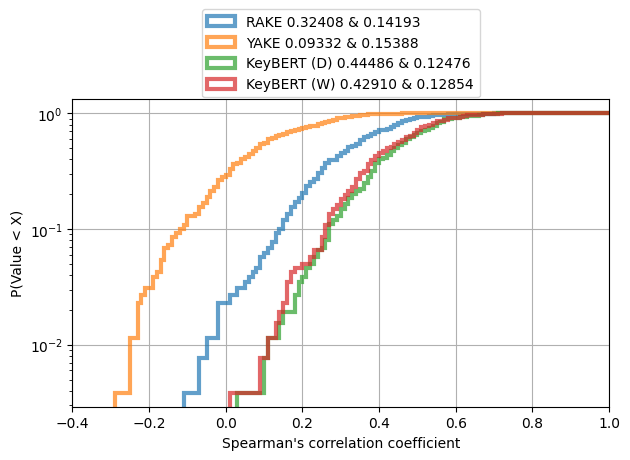

' 0.32408 & 0.14193 &  0.09332 & 0.15388 &  0.44486 & 0.12476 &  0.42910 & 0.12854 & '

In [443]:
labels = myspear_labels

all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(-.4,1.2,.01),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel("Spearman's correlation coefficient")
plt.ylabel('P(Value < X)')
plt.xlim([-.4,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("spear.pdf")
plt.show()
all_labs

In [372]:
def jaccard_key25(x,y):
    s1 = set(list(x.keys())[:25])
    s2 = set(list(y.keys())[:25])
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [444]:
top_compare['jaccard_tr_kdb'] = top_compare.apply(lambda row: jaccard_key25(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['jaccard_tr_kwb'] = top_compare.apply(lambda row: jaccard_key25(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['jaccard_tr_yk'] = top_compare.apply(lambda row: jaccard_key25(row['trends'],row['yake_counter']),axis=1)
top_compare['jaccard_tr_rk'] = top_compare.apply(lambda row: jaccard_key25(row['trends'],row['rake_counter']),axis=1)
jac_labels = {'jaccard_tr_rk':'RAKE','jaccard_tr_yk':'YAKE','jaccard_tr_kdb':'KeyBERT (D)','jaccard_tr_kwb':'KeyBERT (W)'}

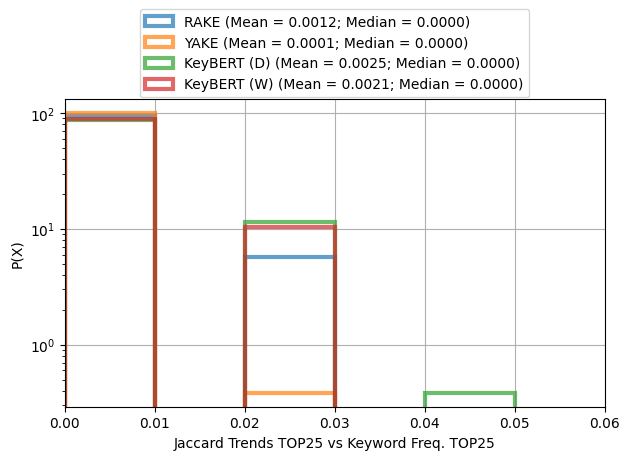

In [445]:
labels = jac_labels

for k in labels:
    label_add = " (Mean = %.4f; Median = %.4f)" % (top_compare[k].mean(),top_compare[k].median())
    top_compare[k].hist(log=True,alpha=.7, density=True, bins=np.arange(0,.1,.01),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel("Jaccard Trends TOP25 vs Keyword Freq. TOP25")
plt.ylabel('P(X)')
plt.xlim([-0,.06])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("jac.pdf")
plt.show()


In [446]:
def my_kt(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        x_match_val.append(gt[k])
        if k in other:
            y_match_val.append(other[k])
        else:
            y_match_val.append(0)
            zeros += 1
    ret = kendalltau(x_match_val,y_match_val)
    return ret[0]#,ret[1],zeros


In [447]:
top_compare['kendalltau_tr_kdb'] = top_compare.apply(lambda row: my_kt(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['kendalltau_tr_kwb'] = top_compare.apply(lambda row: my_kt(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['kendalltau_tr_yk'] = top_compare.apply(lambda row: my_kt(row['trends'],row['yake_counter']),axis=1)
top_compare['kendalltau_tr_rk'] = top_compare.apply(lambda row: my_kt(row['trends'],row['rake_counter']),axis=1)

In [448]:
kt_labels = {'kendalltau_tr_rk':'RAKE','kendalltau_tr_yk':'YAKE','kendalltau_tr_kdb':'KeyBERT (D)','kendalltau_tr_kwb':'KeyBERT (W)'}

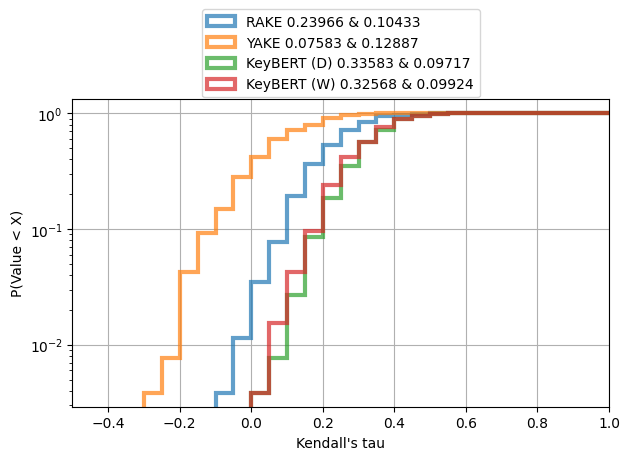

' 0.23966 & 0.10433 &  0.07583 & 0.12887 &  0.33583 & 0.09717 &  0.32568 & 0.09924 & '

In [449]:
labels = kt_labels

all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(-.5,1.2,.05),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel("Kendall's tau")
plt.ylabel('P(Value < X)')
plt.xlim([-.5,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("ktau.pdf")
plt.show()

all_labs

In [450]:
def my_ndcg(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        x_match_val.append(gt[k])
        if k in other:
            y_match_val.append(other[k])
        else:
            y_match_val.append(0)
            zeros += 1
    ret = ndcg_score([x_match_val],[y_match_val])
    return ret


In [451]:
top_compare['ndcg_tr_kdb'] = top_compare.apply(lambda row: my_ndcg(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['ndcg_tr_kwb'] = top_compare.apply(lambda row: my_ndcg(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['ndcg_tr_yk'] = top_compare.apply(lambda row: my_ndcg(row['trends'],row['yake_counter']),axis=1)
top_compare['ndcg_tr_rk'] = top_compare.apply(lambda row: my_ndcg(row['trends'],row['rake_counter']),axis=1)

In [452]:
ndcg_labels = {'ndcg_tr_rk':'RAKE','ndcg_tr_yk':'YAKE','ndcg_tr_kdb':'KeyBERT (D)','ndcg_tr_kwb':'KeyBERT (W)'}

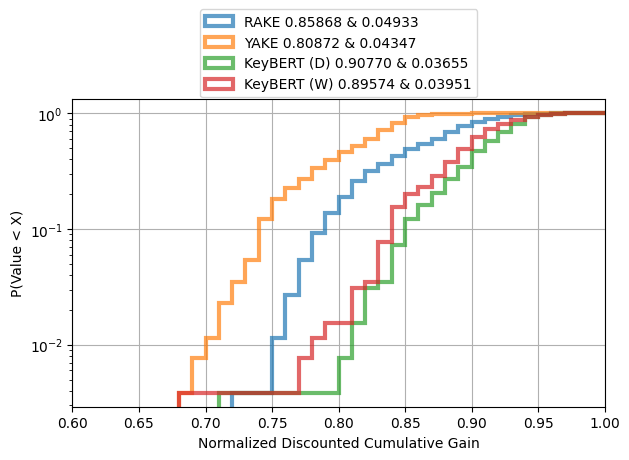

' 0.85868 & 0.04933 &  0.80872 & 0.04347 &  0.90770 & 0.03655 &  0.89574 & 0.03951 & '

In [453]:
labels = ndcg_labels

all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(0,1.2,.01),label=labels[k]+label_add, histtype='step',lw=3)
plt.xlabel("Normalized Discounted Cumulative Gain")
plt.ylabel('P(Value < X)')
plt.xlim([0.6,1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("ndcg.pdf")
plt.show()

all_labs

In [454]:
def my_lrap(gt,other):
    x_match_val = []
    y_match_val = []
    zeros = 0
    for k in gt.keys():
        x_match_val.append(1)
        if k in other:
            y_match_val.append(other[k])
        else:
            y_match_val.append(0)
    for k in other.keys():
        if k not in gt:
            x_match_val.append(0)
            y_match_val.append(other[k])
    ret = label_ranking_average_precision_score([x_match_val],[y_match_val])
    return ret


In [455]:
top_compare['lrap_tr_kdb'] = top_compare.apply(lambda row: my_lrap(row['trends'],row['keybert_day_counter']),axis=1)
top_compare['lrap_tr_kwb'] = top_compare.apply(lambda row: my_lrap(row['trends'],row['keybert_week_counter']),axis=1)
top_compare['lrap_tr_yk'] = top_compare.apply(lambda row: my_lrap(row['trends'],row['yake_counter']),axis=1)
top_compare['lrap_tr_rk'] = top_compare.apply(lambda row: my_lrap(row['trends'],row['rake_counter']),axis=1)
lrap_labels = {'lrap_tr_rk':'RAKE','lrap_tr_yk':'YAKE','lrap_tr_kdb':'KeyBERT (D)','lrap_tr_kwb':'KeyBERT (W)'}

In [456]:
#lrap_labels = {'lrap_tr_kdb':'KeyBERT (D)','lrap_tr_kwb':'KeyBERT (W)','lrap_tr_yk':'YAKE','lrap_tr_rk':'RAKE'}

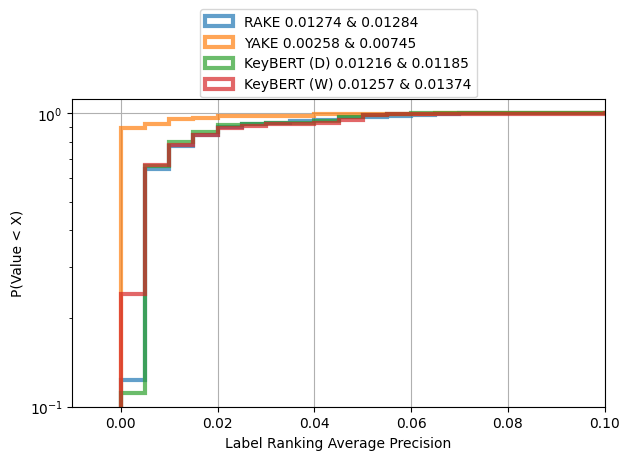

' 0.01274 & 0.01284 &  0.00258 & 0.00745 &  0.01216 & 0.01185 &  0.01257 & 0.01374 & '

In [457]:
labels = lrap_labels

all_labs = ""

for k in labels:
    label_add = " %.5f & %.5f" % (top_compare[k].mean(),top_compare[k].std())
    all_labs += label_add + " & "
    top_compare[k].hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(0,1,.005),label=labels[k]+label_add, histtype='step',lw=3)

plt.xlabel("Label Ranking Average Precision")
plt.ylabel('P(Value < X)')
plt.xlim([-.01,.1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("lrap.pdf")
plt.show()

all_labs

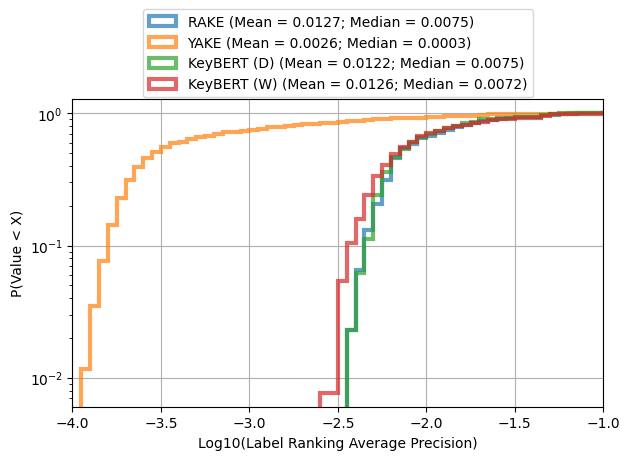

In [458]:
labels = lrap_labels

for k in labels:
    label_add = " (Mean = %.4f; Median = %.4f)" % (top_compare[k].mean(),top_compare[k].median())
    np.log10(top_compare[k]).hist(log=True,alpha=.7, density=True, cumulative=1, bins=np.arange(-4,-.1,.05),label=labels[k]+label_add, histtype='step',lw=3)

plt.xlabel("Log10(Label Ranking Average Precision)")
plt.ylabel('P(Value < X)')
plt.xlim([-4,-1])
plt.legend(loc="center",bbox_to_anchor=(.5, 1.15))
plt.tight_layout()
plt.savefig("llrap.pdf")
plt.show()




In [460]:
len(top_compare)

260